# Autocorrelation

**Topics:**
- Signal analysis using autocorrelation

**Learning goals:**
- Become familiar with how autocorrelatino works on random signals
- Be able to calculate an autocorrelation sequence and analyze the result

**Python modules and notebook config:**

In [2]:
from numpy import sin, cos, pi, exp, empty, mean, abs, angle # Sentrale matematiske funksjoner
import numpy as np                          # Importer funksjonalitet fra numpy biblioteket med prefiks "np"
import scipy.signal as sig                  # Importerer signalbehandlingsmodulen til scipy
import matplotlib.pyplot as plt             # Importer pyplot modulen i matplotlib med prefiks "plt"

%matplotlib inline




### Introduction
[Correlation](https://en.wikipedia.org/wiki/Correlation_and_dependence) or cross-correlation is a statistical measure for the dependencies between two different signals $x[n]$ and $y[n]$, expressed as a function of *relative shift*. The cross-correlation function $r_{xy}[l]$ defined below can thus be seen as an answer to the question "*how similar is $y[n]$ to $x[n]$ if the entire waveform of $y[n]$ is displaced by $l$ samples?*". 

$$r_{xy}[l] = E\left(x[n]\cdot y[n-l]\right)$$

[Auto-correlation](https://en.wikipedia.org/wiki/Autocorrelation) on the other hand, characterizes the temporal dependencies within one random signal $x[k]$. Autocorrelation is, in principle, what you get if you calculate the cross-correlation between a signal $x[n]$ and itself, and is defined as.

$$r_{xx}[l] = E\left(x[n]\cdot x[n-l]\right)$$

While the possible uses of cross-correlation (such as radar and sonar systems) are quite easy to spot, it may not be quite as apparent why "comparing" a signal to itself should be useful. However, once we begin to consider [random signals](https://en.wikipedia.org/wiki/Stochastic_process), it becomes clear that it is possible to make certain assumptions about the shape of the autocorrelation function even if each individual sample is $100\%$ random.

### Autocorrelation and noise signals

Take for instance white gaussian noise, where each sample $v[n]$ is a random value taken from a gaussian probability distribution with zero mean and $\sigma_v^2$ variance (noise power):  $v[n] \sim \mathcal{N} \left(0, \sigma_v^2\right)$. Since each sample value is entirely random there should be no dependence between a sample $x[n]$ and any preceding or succeding samples $x[n-k], k \neq 0$. Therefore, the autocorrelation function for $v[n]$ is:

$$r_{vv}[l] = \sigma_v^2 \cdot \delta[l]$$

Becuase of this property, white noise is often referred to as *uncorrelated noise*. The code cell below demonstrates this by generating a random signal `v` using `numpy.random`, and calculating the auto-correlation using the function [`correlate`](https://numpy.org/doc/stable/reference/generated/numpy.correlate.html).

Text(0.5, 1.0, 'Autocorrelation estimate $\\hat{r}_{vv}[l]$ for white noise')

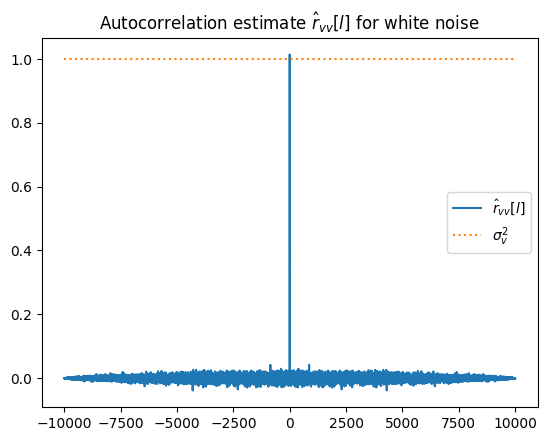

In [3]:
N = 10_000  # Length of signal
noise_pow = 1
v = np.random.normal(loc=0.0, scale=np.sqrt(noise_pow), size=N)

r_vv = np.correlate(v, v, mode="full")/N
l = np.arange(-N+1, N)
plt.plot(l, r_vv, label="$\\hat{r}_{vv}[l]$")
plt.plot([l[0], l[-1]], noise_pow*np.ones(2), ":", label="$\\sigma_v^2$")
plt.legend()
plt.title("Autocorrelation estimate $\\hat{r}_{vv}[l]$ for white noise")

It is important to note however, that what we have calculated above is an autocorrelation *estimate* $\hat{r}_{xx}[l]$, which should approach the true autocorrelation *function* $r_{xx}[l]$ as $N$ approaches infinity. The mathematical operation which resulted in the figure above is given in equation $1$, and is typically referred to as a *biased* autocorrelation estimate (due to how it "tapers off" towards the edges).

$$\hat{r}_{xx}[l] = \frac{1}{N} \sum_{n=-N+1}^{N-1} x[n]\cdot x[n-l] \tag{1}$$

### Autocorrelation and periodic signals

A you may remember from exercise 1, the definition of a periodic signal $x(t)$ is a signal which equals itself if it is displaced by an integer multiple of it's fundamental period $T_0$, which gave rise to the equation $x(t) = x\left(t - k \cdot T_0 \right)$. In other words, if a discrete-time signal $x[n]$ has a fundamental period of $M$ samples, the auto-correlation funciton $r_{xx}[l]$ should peak at samples $l = k \cdot M, \ \ k \in \mathbb{Z}$. [Here](Figurer/autocorr.png) is an overview of some typical periodic functions/waveforms and their autocorrelation function, notice how the autocorrelation function will *always* have a "phase-shift" of $0$ regardless of what the phase compnent of the periodic signal $x[n]$ happens to be. Auto-correlation can therefore be a very useful tool when attempting to determine the fundamental period of a signal $x[n]$, since periodic elements will typically be highlighted.

## Task

### a)

Given a signal $x[n]$ descirbed as follows:
$$\begin{align}
x[n] &= s[n] + v[n] \\ 
&\text{where} \\
s[n] &=4 \cdot \sin(2\pi \cdot 5 \cdot n) \\
v[n] &\sim \mathcal{N}\left(\mu_v = 0, \sigma_v^2 = 4\right)
\end{align}$$
Since the noise is not correlated with the sine wave, the auto-correlation function $r_{xx}[l]$ can be written as:
$$
\begin{align}
r_{xx}[l] &= r_{ss}[l] + r_{vv}[k] \\ 
&= A \cdot \cos(2\pi \cdot 5 \cdot n) + B \cdot \delta[n]
\end{align}$$

What are the values of $A$ and $B$ in the above equation?



In [4]:
A = "8"
B = "4"
# WRITE YOUR CODE IN THIS CELL:

In [5]:
from hashlib import sha1
assert sha1(str(round(float(A), 0)).encode('utf-8')+b'c76c6').hexdigest() == 'c1fde03a848ca891c025f098b80cc5c8f07d3188', 'Wrong answer for A :('
print('Correct answer for A :)')
assert sha1(str(round(float(B), 0)).encode('utf-8')+b'c76c6').hexdigest() == '42b6189a63d34922949a0f53290e646b94951618', 'Wrong answer for B :('
print('Correct answer for B :)')

Correct answer for A :)
Correct answer for B :)


<br>
Attached to this assignment is a data file containing a different signal $x[n] = s[n] + v[n]$ where $s[n]$ is some periodic signal, and $v[n]$ is noise. The code cell below will load this data into an array `x`, and display a plot of the signal.


Text(0.5, 0, 'Sample number $n$ ')

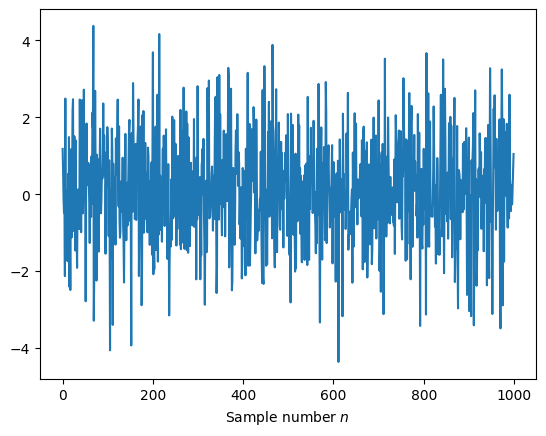

In [6]:
from scipy.io import loadmat
data = loadmat("data/autocorr.mat", squeeze_me=True)
x = data['x']
plt.plot(x)
plt.xlabel("Sample number $n$ ")

As we can see from the plot above, the periodic nature of the signal $x[n]$ is not at all evident.

### b) 

Use Python to produce an estimated autocorrelation sequence $\hat{r}_{xx}[l]$, and display the it in a new plot. 

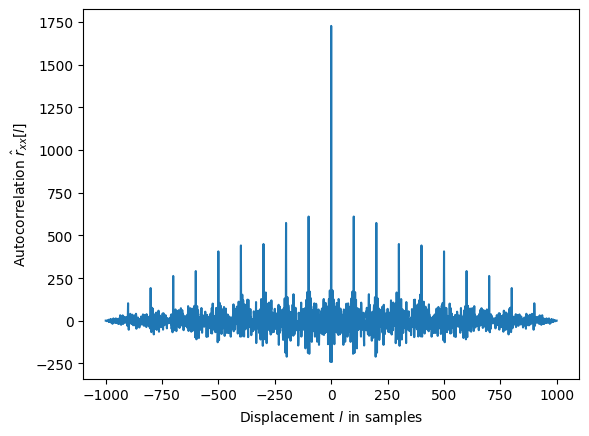

In [7]:

plt.plot(np.arange(-len(x)+1, len(x)), np.correlate(x, x, mode="full"))
plt.xlabel("Displacement $l$ in samples")
plt.ylabel("Autocorrelation $\\hat{r}_{xx}[l]$")
plt.savefig("Figurer/task3b_lf.png")

## This was here?

[Here](Figurer/task3b_lf.png) is a plot showing what the plot of $\hat{r}_{xx}[l]$ may look like.


### c)

Use either visual inspection of the figure from task **b)**, or automated analysis of the autocorrelation sequence $\hat{r}_{xx}[l]$ to calculate the fundamental period $M$ of the periodic element $s[n]$ contained within the signal $x[n]$.

In [8]:
M = "100"
# WRITE YOUR CODE IN THIS CELL:

In [9]:
from hashlib import sha1
assert sha1(str(round(float(M), 0)).encode('utf-8')+b'38b4').hexdigest() == '649cefdd91cec1457248b609312be7a512d9b500', 'Wrong answer for M :('
print('Correct answer for M :)')

Correct answer for M :)
